# Neural Networks

**Basic Perceptron**
<img src='BasicPerceptron.png'>
**Can be seen as**
<img src='PercWStep.png'>

# Why "Neural Networks"?
Perceptrons look similar to dendrites as they take input and activate for some decision

# Percpetrons as Logical Operators

In [1]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -2.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                  -2.0                    0          Yes
       0          1                  -1.0                    0          Yes
       1          0                  -1.0                    0          Yes
       1          1                   0.0                    1          Yes


# Convert an AND to an OR Perceptron

<li> Increase the weights
<li> Decrease the magnitude of the bias

<img src='AndOrPerc.png'>

In [2]:
# NOT Perceptron
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = -1.
bias = -0.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.0                    1          Yes
       0          1                  -1.0                    0          Yes
       1          0                   0.0                    1          Yes
       1          1                  -1.0                    0          Yes


# XOR Perceptron
<img src='XORBlank.png'>

Using an AND with a NOT perceptron and an OR perceptron, we can achieve the XOR perceptron

<img src='XORFilled.png'>

# Perceptron Trick

In [3]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


# Solving Softmax

In [7]:
L = [5, 6, 7]

import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    z = np.exp(L)
    sumZ = sum(z)
    output= []
    
    for i in z:
        output.append(i/sumZ)
    return output

# def softmax(L):
#     expL = np.exp(L)
#     sumExpL = sum(expL)
#     result = []
#     for i in expL:
#         result.append(i*1.0/sumExpL)
#     return result

softmax(L)

[0.09003057317038046, 0.24472847105479764, 0.6652409557748219]

# Cross Entropy

A good model gives a **low cross entropy** and a bad model gives a **high cross entropy**
<img src='CrossEntropy.png'>

## Goal: minimize the cross entropy
The error function is the cross entropy function

**Basics of cross entropy**
"If I have a bunch of events and a bunch of probabilities, how likely is that those events happen based on the probabilities"
<li> Very likely: small cross entropy
<li> Very unlikely: large cross entropy
    
<img src='CrossEntTable.png'>

$$ CrossEntropy = - \sum_{i}^{n} y_{i} * ln(p_{i}) + (1-y_{i}) * ln(1 - p_{i}) $$

<img src='CrossEntForm.png'>

In [9]:
Y=[1,0,1,1]
P=[0.4,0.6,0.1,0.5]

import numpy as np

def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

cross_entropy(Y, P)

4.828313737302301

# Multi-Class Cross-Entropy

$$ CrossEntropy = - \sum_{i}^{n} \sum_{j}^{m} y_{ij} * ln(p_{ij}) $$

<img src='MultClasEnt.png'>

# Minimizing the error function 

We will use these two formulas as the Error Functions we are going to minimize

$$ErrorFunction=\frac{-1}{m} \sum_{i}^{m} (1-y_{i})(ln(1-\hat{y_{i}}) + y_{i}ln(\hat{y}_{i})$$

$$E(W,b)= \frac{-1}{m} \sum_{i}^{m} (1-y_{i})(ln(1-\sigma (Wx^{(i)}+b)) + y_{i}ln(\sigma (Wx^{(i)}+b)$$

## Minimizing the error function 

**Note:**

$$\sigma = \frac{1}{1+e^{-x}}$$

$$\frac{\delta(\sigma)}{\delta x} = \frac{e^{-x}}{(1+e^{-x})^{2}}=\frac{1}{1+e^{-x}} * \frac{e^{-x}}{1+e^{-x}} = \sigma(x)(1-\sigma(x))$$
$$ \rightarrow $$

$$\frac{\delta(\sigma)}{\delta x} = \sigma(x)(1-\sigma(x))$$

... and the Error Function is:
$$E=\frac{-1}{m} \sum_{i}^{m} (1-y_{i})(ln(1-\hat{y_{i}}) + y_{i}ln(\hat{y}_{i})$$

... where:
$$\hat{y_{i}} = \sigma(Wx^{(i)}+b)$$

Then to minimize E:
$$\nabla E = ( \frac{\delta}{\delta w_{1}} E, ... , \frac{\delta}{\delta w_{n}} E , \frac{\delta}{\delta b} E )$$

The error produced by each point is simply:
$$E = -yln(\hat{y})-(1-y)ln(1-\hat{y})$$

Recall:
$$\hat{y} = \sigma(Wx+b)$$

...so
$$\frac{\delta(\hat{y})}{\delta w_{j}} = \frac{\delta (\sigma(Wx+b)}{\delta w_{j}} = \sigma(Wx+b)(1-\sigma(Wx+b))*\frac{\delta(Wx+b)}{\delta w_{j}}$$
$$ \rightarrow $$
$$\frac{\delta(\hat{y})}{\delta w_{j}} = \hat{y}(1-\hat{y})*\frac{\delta(Wx+b)}{\delta w_{j}} = \hat{y}(1-\hat{y}) * \frac{\delta}{\delta w_{j}} (w_{1}x_{1} + ... + w_{j}x_{j} + ... + w_{n}x_{n} + b) $$
$$ \rightarrow $$
$$ \frac{\delta(\hat{y})}{\delta w_{j}} = \hat{y}(1-\hat{y})*x_{j}$$

**SO**
$$ \frac{\delta E}{\delta w_{j}} = -(y-\hat{y})x_{j}$$

**Similarly**
$$ \frac{\delta E}{\delta b} = -(y-\hat{y})$$

**THEN**
$$\nabla E = ( \frac{\delta}{\delta w_{1}} E, ... , \frac{\delta}{\delta w_{n}} E , \frac{\delta}{\delta b} E ) = -(y-\hat{y})*<x_{1}, ..., x_{n}, 1> $$

**Note:**
<li> The gradient is actually a scalar times the coordinates of the point
<li> The scalar is a multiple of the difference between the label and the prediction
    
    Closer the label to the prediction, smaller the gradient
    Farther the label from prediction, larger the gradient

$$ scalar = -1(y-\hat{y})$$

# Gradient Descent Stepping

Gradient descent step simply consists in subtracting a multiple of the gradient of the error function at every point, then this updates the weights in the following way:

$$w_{i}^{'} \leftarrow w_{i} - \alpha [-(y-\hat{y})x_{i}]$$
$$\iff$$
$$w_{i}^{'} \leftarrow w_{i} + \alpha (y-\hat{y}x_{i})$$

We update the bias in the following way:
$$b^{'} \leftarrow b+ \alpha(y-\hat{y})$$

**Note on scalar $\alpha$:**

Since we've taken the average of the errors, the term we are adding should be $\frac{1}{m} * \alpha$ instead of $\alpha$ alone, but as $\alpha$ is a constant scalar value, we let it absorb $\frac{1}{m}$ to simplify calculations and abuse notation. We will use $\frac{1}{m} * \alpha$ as the learning rate however, regardless of notation.

# Implementing gradient descent

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

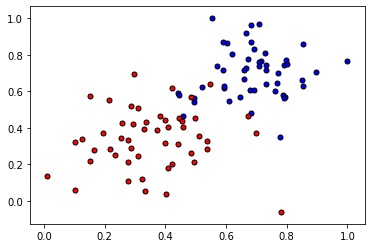

In [11]:
data = pd.read_csv('GradDescData.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [12]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    
    return 1/ (1 + np.exp(-1 * x))

# Output (prediction) formula
def output_formula(features, weights, bias):
    
    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):

    return -1 * y * np.log(output)- (1-y) * np.log(1-output)

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    
    return weights, bias


## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [13]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669508
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.4593334641861401
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.3973461571671399
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.3379273658879921
Accuracy:  0.94


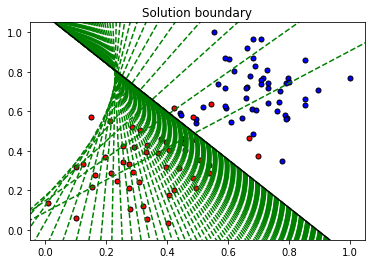

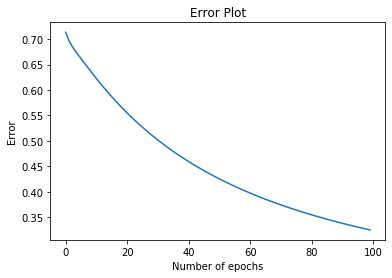

In [14]:
train(X, y, epochs, learnrate, True)

# Neural Network Architecture - multilayer perceptrons

<img src='CreatingNonLinMod.png'>

<img src='LinToNeur.png'>

Steps in Neural Network creation:
<img src='NN1.png'>

<img src='NN2.png'>

<img src='NN3.png'>

<img src='NN3a.png'>

# Feedforward

Feedforward is the process neural networks use to turn the input into an output.

**Training:** In a neural network, what parametets should there be on the edges to model our data well

<img src='FForward1.png'>

<img src='FForward2.png'>

<img src='FForward3.png'>

# Neural Network Error Function

<img src='NNerror.png'>

# Backpropogation

**Backpropagation will consist of:**

<li> Doing a feedforward operation
<li> Comparing the output of the model with the desired output
<li> Calculating the error
<li> Running the feedforward operation backwards (backpropagation) to spread the error to each of the weights
<li> Use this to update the weights, and get a better model
<li> Continue this until we have a model that is good
    
<img src='BP1.png'>

<img src='BP2.png'>

**Recall: Chain Rule**
<img src='ChainRule.png'>

**Recall: Feedforward**
<img src='FForward3.png'>

**Error Function with BackPropogation:**

<img src='BPError1.png'>

<img src='BPError2.png'>

# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [8]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]
# or
data.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

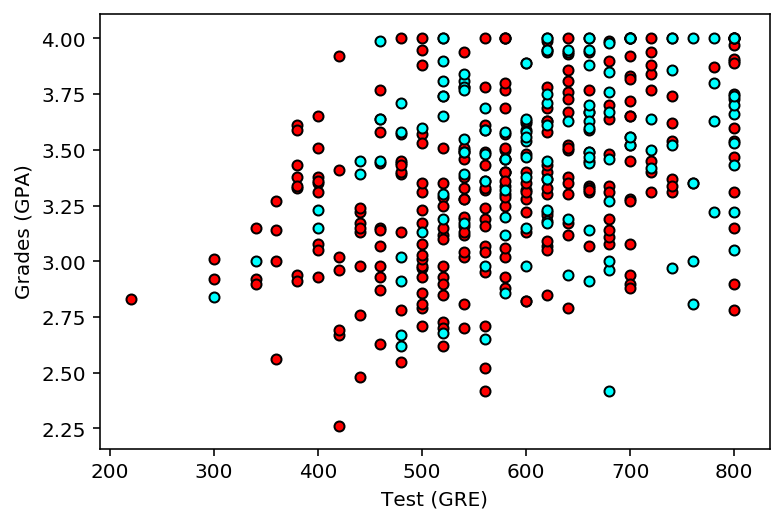

In [4]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

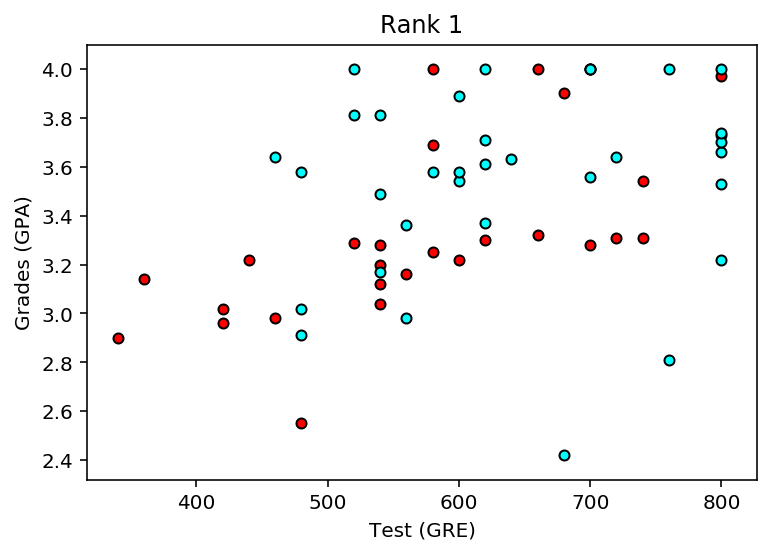

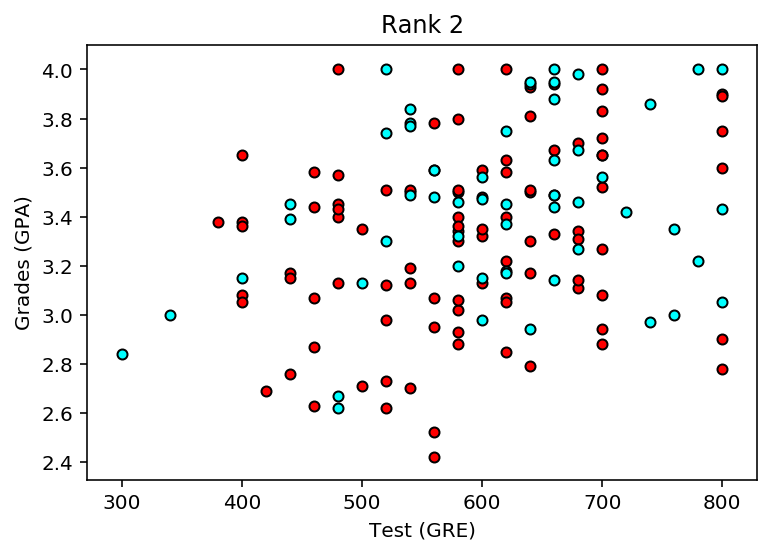

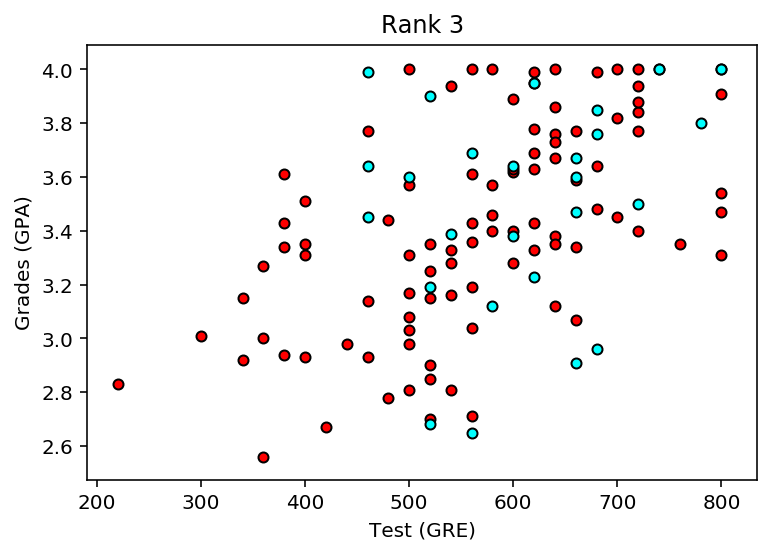

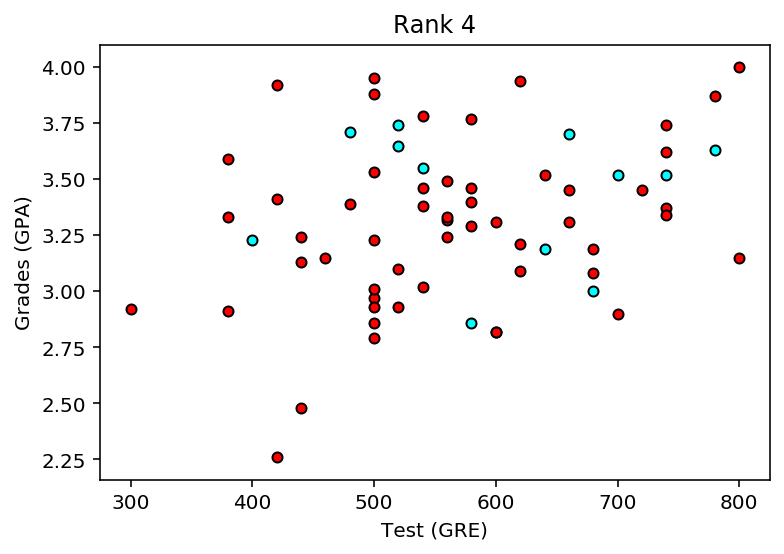

In [9]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## TODO: One-hot encoding the rank
Use the `get_dummies` function in Pandas in order to one-hot encode the data.

In [17]:
# TODO:  Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# TODO: Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## TODO: Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [19]:
# Making a copy of our data
processed_data = one_hot_data[:]

# TODO: Scale the columns
processed_data['gpa'] = processed_data['gpa']/4
processed_data['gre'] = processed_data['gre']/800

# Printing the first 10 rows of our procesed data
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.225625,0,0,1,0
1,1,0.825,0.229375,0,0,1,0
2,1,1.000,0.250000,1,0,0,0
3,1,0.800,0.199375,0,0,0,1
4,0,0.650,0.183125,0,0,0,1
5,1,0.950,0.187500,0,1,0,0
6,1,0.700,0.186250,1,0,0,0
7,0,0.500,0.192500,0,1,0,0
8,1,0.675,0.211875,0,0,1,0
9,0,0.875,0.245000,0,1,0,0


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [23]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print()
print(train_data[:10])
print("="*60)
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40

     admit    gre       gpa  rank_1  rank_2  rank_3  rank_4
62       0  0.800  0.229375       0       0       1       0
67       0  0.775  0.206250       1       0       0       0
232      0  0.475  0.211250       0       1       0       0
182      0  0.875  0.250000       0       1       0       0
196      0  0.825  0.191875       0       0       1       0
136      0  0.700  0.208125       0       0       0       1
240      0  0.550  0.172500       0       1       0       0
273      0  0.825  0.207500       1       0       0       0
168      0  0.625  0.250000       0       0       1       0
59       0  0.750  0.176250       0       0       0       1
    admit    gre       gpa  rank_1  rank_2  rank_3  rank_4
1       1  0.825  0.229375       0       0       1       0
12      1  0.950  0.250000       1       0       0       0
17      0  0.450  0.160000       0       0       1       0
25      1  1.000  0.228750       1   

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [27]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print("="*55)
print(targets[:10])

       gre       gpa  rank_1  rank_2  rank_3  rank_4
62   0.800  0.229375       0       0       1       0
67   0.775  0.206250       1       0       0       0
232  0.475  0.211250       0       1       0       0
182  0.875  0.250000       0       1       0       0
196  0.825  0.191875       0       0       1       0
136  0.700  0.208125       0       0       0       1
240  0.550  0.172500       0       1       0       0
273  0.825  0.207500       1       0       0       0
168  0.625  0.250000       0       0       1       0
59   0.750  0.176250       0       0       0       1
62     0
67     0
232    0
182    0
196    0
136    0
240    0
273    0
168    0
59     0
Name: admit, dtype: int64


## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [28]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))


def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)



# TODO: Backpropagate the error
Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ (y-\hat{y}) \sigma'(x) $$

In [43]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
    return (y-output) * output * (1 - output)
#     return (y - output) * sigmoid_prime(x)



In [44]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.2833702203662531
Epoch: 100
Train loss:  0.2077472526379985
Epoch: 200
Train loss:  0.20528903418984593
Epoch: 300
Train loss:  0.2042802068117277
Epoch: 400
Train loss:  0.20372287905115133
Epoch: 500
Train loss:  0.20336169838981485
Epoch: 600
Train loss:  0.2030908726773743
Epoch: 700
Train loss:  0.20286459521088318
Epoch: 800
Train loss:  0.2026622651936154
Epoch: 900
Train loss:  0.20247423937396644
Finished training!


## Calculating the Accuracy on the Test Data

In [45]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.625
